In [534]:
import numpy as np
import pandas as pd

data = pd.read_csv("dataset_Caso_1.csv")
data.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [535]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [536]:
data["target"].value_counts()
# Target desequilibrado.

0    1978
1      22
Name: target, dtype: int64

In [537]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [538]:
# Codificamos las columnas x3 y x4
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data["x3"].values.reshape(-1, 1)).toarray()
data_encoded = pd.concat([data.drop('x3', axis=1), pd.DataFrame(onehot_encoded)], axis=1)



onehot_encoder2 = OneHotEncoder()
onehot_encoded2 = onehot_encoder2.fit_transform(data["x4"].values.reshape(-1, 1)).toarray()
data_encoded2 = pd.concat([data_encoded.drop('x4', axis=1), pd.DataFrame(onehot_encoded)], axis=1)


data_encoded2.columns = ["x1","x2","x5","x6","x7","x8","target",
                             "x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]
data_encoded2

,x1,x2,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
0,50.1341,-326.0000,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,50.1341,-326.0000,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,124.3276,-275.1935,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50.1341,-326.0000,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,85.3905,-298.8632,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,106.2410,-294.7023,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,127.0572,-295.2308,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,114.4653,-290.3312,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [539]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

columnas = ['x1', 'x2', 'x5', 'x6', 'x7', 'x8', 'x3_cod0', 'x3_cod1',
       'x3_cod2', 'x3_cod3', 'x4_cod0', 'x4_cod1', 'x4_cod2', 'x4_cod3']
X = data_encoded2[columnas]
y = data_encoded2["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,
                                                   random_state=35)

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_train_pred_proba = gb.predict_proba(X_train)[:,1]
y_test_pred_proba = gb.predict_proba(X_test)[:,1]


In [540]:
# Para train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
auc_train = roc_auc_score(y_train, y_train_pred_proba)


In [541]:
# Para test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
auc_test = roc_auc_score(y_test, y_test_pred_proba)

In [542]:
optimal_idx_train = np.argmax(tpr_train - fpr_train)
optimal_threshold_train = thresholds[optimal_idx_train]

In [543]:
optimal_idx_test = np.argmax(tpr_test - fpr_test)
optimal_threshold_test = thresholds[optimal_idx_test]

In [544]:
y_train_pred = (y_train_pred_proba >= optimal_threshold_train).astype(int)
y_test_pred = (y_test_pred_proba >= optimal_threshold_test).astype(int)

In [545]:
from sklearn.metrics import confusion_matrix, classification_report
train_cm = confusion_matrix(y_train, y_train_pred)
train_cr = classification_report(y_train, y_train_pred)

test_cm = confusion_matrix(y_test, y_test_pred)
test_cr = classification_report(y_test, y_test_pred)

In [546]:
train_cm

array([[1475,    9],
       [   0,   16]])

In [547]:
train_cr

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      1484\n           1       0.64      1.00      0.78        16\n\n    accuracy                           0.99      1500\n   macro avg       0.82      1.00      0.89      1500\nweighted avg       1.00      0.99      0.99      1500\n'

In [548]:
test_cm

array([[272, 222],
       [  0,   6]])

In [549]:
test_cr


'              precision    recall  f1-score   support\n\n           0       1.00      0.55      0.71       494\n           1       0.03      1.00      0.05         6\n\n    accuracy                           0.56       500\n   macro avg       0.51      0.78      0.38       500\nweighted avg       0.99      0.56      0.70       500\n'

In [550]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average = "weighted")
f1_test = f1_score(y_test, y_test_pred, average = "weighted")

In [551]:
print("AUC (train): {:.3f}".format(roc_auc_score(y_train, y_train_pred_proba)))
print("AUC (test): {:.3f}".format(roc_auc_score(y_test, y_test_pred_proba)))
print("F1 (train): {:.3f}".format(f1_train))
print("F1 (test): {:.3f}".format(f1_test))

AUC (train): 1.000
AUC (test): 0.883
F1 (train): 0.995
F1 (test): 0.702


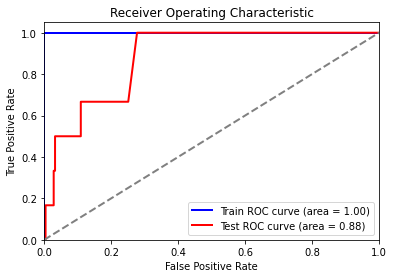

In [552]:
import matplotlib.pyplot as plt

plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()